# Probabilistic Machine Learning
<div style="text-align: right"> University of Tübingen, Summer Term 2023  &copy; 2023 P. Hennig </div>

**Exercise Sheet No. 1 — Setting Up**


Submission by:

+ Batuhan, Oezcoemlekci, Matrikelnummer: 6300476

+ Aakarsh, Nair, Matrikelnummer: 6546577

## Exercise 1.1

Assume that, if A is true, B becomes more plausible. That is,
$P(B|A) ≥ P(B)$.

Using the rules of probability (sum rule and product rule) as stated in the lecture, show
the following relationships (stated in the lecture without proof)

NOTE that sum and product rule implies the Bayes' Rule. Also note that any probability is between [0,1].  

#### (a) $P(B|¬A) ≤ P(B)$ (“If A is false, B becomes less plausible”)

$$P(B|A) ≥ P(B)$$
$$P(B,A)/P(A) ≥ P(B)$$
$$P(A|B)P(B)/P(A) ≥ P(B)$$
$$1-P(A|B) ≤ 1-P(A)$$
$$P(¬A|B) ≤ P(¬A)$$
$$P(B|¬A)P(¬A)/P(B) ≤ P(¬A)$$
$$P(B|¬A)/P(B) ≤ 1$$
$$P(B|¬A) ≤ P(B)$$ 
$$ QED $$


**Longer Variation**


We have been given that $P(B|A) \geq P(B)$, we start by exploring the consequences of this.

Using the *law of total probability* we know that: 

$$
    P(B) = P(A) P(B|A) + (1 - P(A)) P(B| \neg A)
$$


Where we additionally used that $P(\neg A) = (1 - P(A))$. 

Substituting in our given inequality we see that: 

$$
    P(B|A) \geq P(A) P(B|A) + (1 - P(A)) P(B| \neg A)
$$

Simplifying we get the inequality:

$$
    (1 - P(A)) P(B|A) \geq (1 - P(A)) P(B | \neg A)
$$

We assume $P(A) \neq 1$, and we know that $P(A) \leq 1$, by virtue of being a probability distribution.

Thus dividing by $(1-P(A))$ on both sides leaves the inequality unaltered, we get: 

$$
    P(B|A) \geq P(B | \neg A)
$$

or $P(B|A)  - P(B| \neg A) \geq 0$


Now we revisit the law of total probability:
$$
    P(B) = P(B|A)P(A) + (1 - P(A)) P(B|\neg A)
$$ 

simplifying we get 

$$P(B) = P(B|A)P(A)  - P(B| \neg A) P(A) + P(B | \neg A)$$

Consider the first two terms combined as $P(A) (P(B|A) - P(B| \neg A))$. From before we have $P(A) \geq 0 $ and $P(B|A) - P(B| \neg A) \geq 0$. Thus the combined term 
$P(A) (P(B|A) - P(B| \neg A)) \geq 0$. Let $\delta  = P(A) (P(B|A) - P(B| \neg A)) $ then we have $\delta \geq 0$. 

In our expression we have 

$$P(B) = \delta + P(B| \neg A) , \delta \geq 0$$

Giving us the inequality we need,  $P(B) \geq P(B | \neg A)$


#### (b) $P(A|B) ≥ P(A)$ (“If B is true, A becomes more plausible”)

$$P(B|A) ≥ P(B)$$
$$P(B,A)/P(A) ≥ P(B)$$
$$P(A|B)P(B)/P(A) ≥ P(B)$$
$$P(A|B)P(B) ≥ P(B)P(A)$$
$$P(A|B) ≥ P(A)$$ 
$$ QED$$


**Longer Variation**

We have been given that, $P(B|A) \geq P(B)$, that is if $A$ is true then $B$, 
becomes more plausible. We can use Bayes' Theorem to rewrite $P(B|A)$ in terms 
of $P(A|B)$ we note the two are related as 

$$
    P(B|A) = \frac{P(A|B)P(B)}{P(A)}
$$

We can substitute this expression for $P(B|A)$ in our given inequality 
$P(B|A) \geq P(B)$  we get: 

$$ \frac{P(A|B)P(B)}{P(A)} \geq P(B) $$

Multiply both sides of our given inequality by $\frac{P(A)}{P(B)}$, 
assuming $P(B) \neq 0$, this fraction is positive as both values 
probabilities.

This gives us:

$$
    P(A|B) \geq P(A)
$$


#### (c) $P(A|¬B) ≤ P(A)$ (“If B is false, A becomes less plausible”)

Starting from the result of (b):
$$P(A|B) ≥ P(A)$$
$$P(A,B)/P(B) ≥ P(B)$$
$$P(B|A)P(A)/P(B) ≥ P(A)$$
$$1-P(B|A) ≤ 1-P(B)$$
$$P(¬B|A) ≤ P(¬B)$$
$$P(A|¬B)P(¬B)/P(A) ≤ P(¬B)$$
$$P(A|¬B)/P(A) ≤ 1$$
$$P(A|¬B) ≤ P(A)$$ 
$$ QED $$

**Longer Version** 

From the previous questions we have that , given $P(B|A) \geq P(B)$, $P(A|B) \geq P(A)$,  thus 
our argument for $P(A| \neg B) \leq P(B)$ is symmetric to the argument in the first problem but with 
the variables $A$ and $B$ switched. We only reproduce it here for completeness.

Consider the expression $P(A|B) \geq P(A)$, from the law of total probability for $P(A)$ we have: 

$$
    P(A|B)  \geq P(A|B) P(B) + P(A | \neg B) (1 - P(B))
$$

We additionally used $P(\neg B) = 1 - P(B)$. 

Thus factoring and rearranging the terms we get. 

$$
    P(A|B) ( 1 - P(B)) \geq P(A| \neg B) ( 1 - P(B))
$$

Assuming $ P(B) \leq 1 $ , we also know that $P(B) \geq 0$, 
we get.

The previous inequality simplifies to : 

$$
    P(A|B)  \geq P(A | \neg B)
$$

Thus let $\gamma = P(A|B)  -  P(A | \neg B)$ then we have $\gamma \geq 0$.

Revisiting the law of total probability for $P(A)$, we have

$$
    P(A) = P(A| B) P(B) + P(A| \neg B) (1 - P(B))
$$

Re-arranging the terms we have
$$
    P(A) = P(B)(P(A|B) - P(A|\neg B)) + P(A|\neg B)
$$
As both $P(B) \geq 0 $  and $\gamma  = P(A|B)  - P(A|\neg B) \geq 0 $ we thus have $P(B) \gamma \geq 0 $

$$
    P(A) = P(B) \gamma + P(A|\neg B)
$$

Thus $P(A | \neg B) \leq P(A)$.


Additionally show that probabilistic reasoning includes Boolean logic as a special case, by
showing that if A ⇒ B is interpreted as equivalent to P(B | A) = 1, then the following
three statements hold:

#### (d) $P(¬A | ¬B) = 1$ ("modus tollens")

We start with the given statement $$P(B|A)=1$$ from the law of total 
probability for binary variables A, B we have:

$$P(B | A) + P(\neg B | A) = 1$$

Thus $P(\neg B | A ) = 0$. 

However we can write an expression for the term $P(A|\neg B)$ in terms of $P(\neg B|A)$ using 
bayes theorem as follows: 

$$
P(A| \neg B) = \frac{P(\neg B|A) P(A)}{P(\neg B)}
$$

It follows then that $P(A| \neg B) = 0$. 

From the law of total probability we know that: 
$$P(\neg A| \neg B) + P( A | \neg B) = 1$$

Thus it follows that as $P(A| \neg B) = 0$ that $P(\neg A | \neg B) = 1$.


#### (e) $P(B | ¬A) ≤ P(B)$ (“If A is false, B becomes less plausible”)

We know from the law of probability that 
$$
P(B) = P(B|A) P(A) + P(B| \neg A) P(\neg A)
$$

As shown previously we can rewrite the above expression as

$$
P(B) = P(A) (P(B|A) - P(B | \neg A)) + P(B|\neg A)
$$

If we let $\delta = P(B|A) - P(B| \neg A)$ we have been given that $P(B|A)=1$, thus if we can show that $P(B|\neg A) = 0$ then $\delta = 1$. 

From the previous part we know that $P(\neg B | \neg A) = 1$, we also that thus that

$$P(\neg B | \neg A)  + P( B | \neg A)  = 1$$

Thus we have $P(B| \neg A) = 0$. Substituting in the equation fro total probability of B we get: 

$$
P(B) = P(A) (1 - 0) + P(B|\neg A)
$$

As $P(A) \geq 0$ from the fact that $P(A)$ is a probability distribution,  
we have $P(B) \geq P(B| \neg A)$ which can be restated as 
$P(B|\neg A) \leq P(B)$.

#### (f) $P(A | B) ≥ P(A)$ (“if B is true, A becomes more plausible”)

We have been given that $P(B|A) = 1$, thus we can write an expression for $P(A|B)$ as follows: 

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{P(A)}{P(B)}
$$

Assuming that $P(B) \neq 0$ as we know that $P(B) \in [0,1]$ we know that 

$$P(A) \leq \frac{P(A)}{P(B)}$$

in other words we have $P(A) \leq P(A|B)$ , that is $P(A |B) \geq P(A)$. 

In [1]:
from io import StringIO

import pandas as pd
import requests
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib import ticker

from tueplots import bundles
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 200})

## Exercise 1.2 (Coding Exercise)

This week's exercise serves as an opener for the course. As a first step, make sure the cell above this works for you. This is mostly to ensure you have `jax` and `tueplots` installed in your local environment, which we will use across the course. If you get errors, try a `pip install jax tueplots pandas`. Consider the well-known Mauna Loa CO$_2$ dataset, which we download directly from [NOAA](https://gml.noaa.gov/ccgg/trends/data.html): 

In [2]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv"
s = requests.get(url).text

df = pd.read_csv(StringIO(s), sep=",", header=51, na_values="-999.99").dropna()
X = df["decimal"]
Y = df["average"]

We do a *very* quick and dirty linear regression on this univariate timeseries.

In [3]:
phi = jnp.stack([jnp.ones(len(X)), jnp.asarray(X)])
w = jnp.linalg.solve((phi @ phi.T), phi @ Y)
Ypred_LinReg = w[0] + w[1] * X


def loss(Yhat):
    return jnp.sqrt(((Y - Yhat) ** 2).mean())


print(f"simple linear regression has train RMSE {loss(Ypred_LinReg):0.2f}")

simple linear regression has train RMSE 3.09


And make a nice plot:

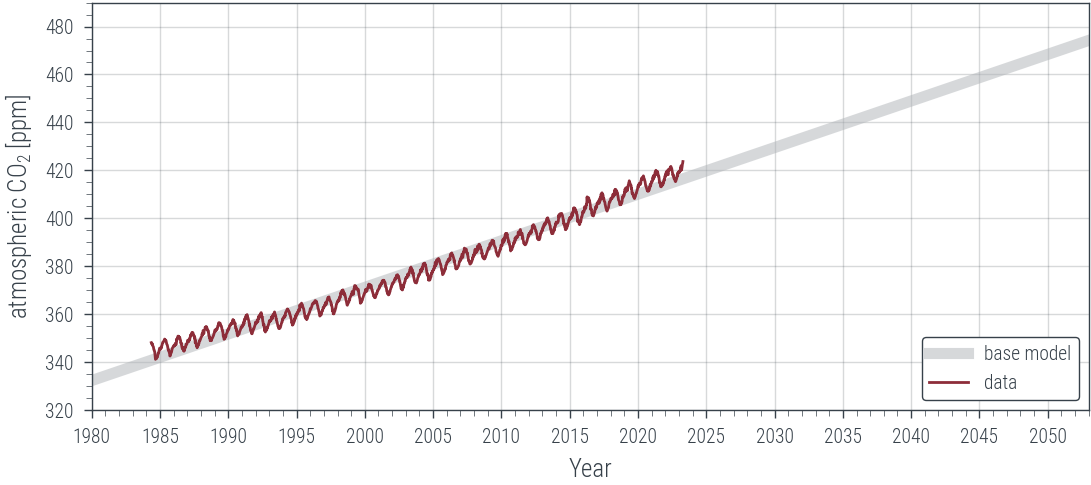

In [4]:
fig, ax = plt.subplots()
x = jnp.linspace(1980, 2053, 200)
ax.plot(x, w[0] + w[1] * x, color=rgb.tue_gray,
        lw=4, alpha=0.5, label="base model")
ax.plot(X, Y, label="data")

ax.set_xlabel("Year")
ax.set_ylabel("atmospheric CO$_2$ [ppm]")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_xlim([1980, 2053])
ax.set_ylim([320, 490])
ax.grid(which="major", axis="both")
ax.legend(loc="lower right", framealpha=1, facecolor="w");

## Your Task:

Using your favorite deep learning framework, define and train a supervised (regression) model on this dataset `X,Y`. Use it to predict on the test inputs `x = jnp.linspace(1980, 2053, 200)` from above, i.e. 30 years into the future. Consider the following aspects:
* Does your model interpolate between the data (i.e. does it predict the actual pairs $(x_i,y_i)$ correctly, or just approximately)?
* Which structural aspects of the data does your model capture (e.g., does its extrapolation also capture the seasonal oscillations present in the data?
* Do you know a way to add a form of *confidence* or *uncertainty* to the prediction? Can you make *worst/best-case* and *most likely* predictions for atmospheric CO$_2$ over the next 30 years?

**Note:** There is obviously no unique "correct" answer to this task. The goal of this exercise is to allow you to reflect on what you may have heard in previous courses about state-of-the-art machine learning models and their training. Deep learning is often perceived as having replaced all of machine learning, and it certainly permeates most of it. However, while deep learning models have led to impressive results on applications like natural language processing and computer vision, they remain nontrivial to train and to interpret; and their extrapolatory behaviour can be underwhelming. Much of the lecture course will be dedicated to understanding models, their training and predictive behaviour better, and to transfer much of what we learn with basic models to deep learning. 

Thus, we do not expect you to provide a perfect answer here. Answers will get the "sufficient" mark (i.e. the associated bonus point in the exam) if they 
* correctly define any model with at least one nonlinearity
* train the model such that its RMSE on the train set (as defined above) is *smaller* than that of linear regression. 
* amend the plot above with the model's prediction on the testset `x` (not the train set!)

#### Fit a Simple Polynomial of Degree 2

simple polynomial of degree 2 regression has train RMSE 3.06


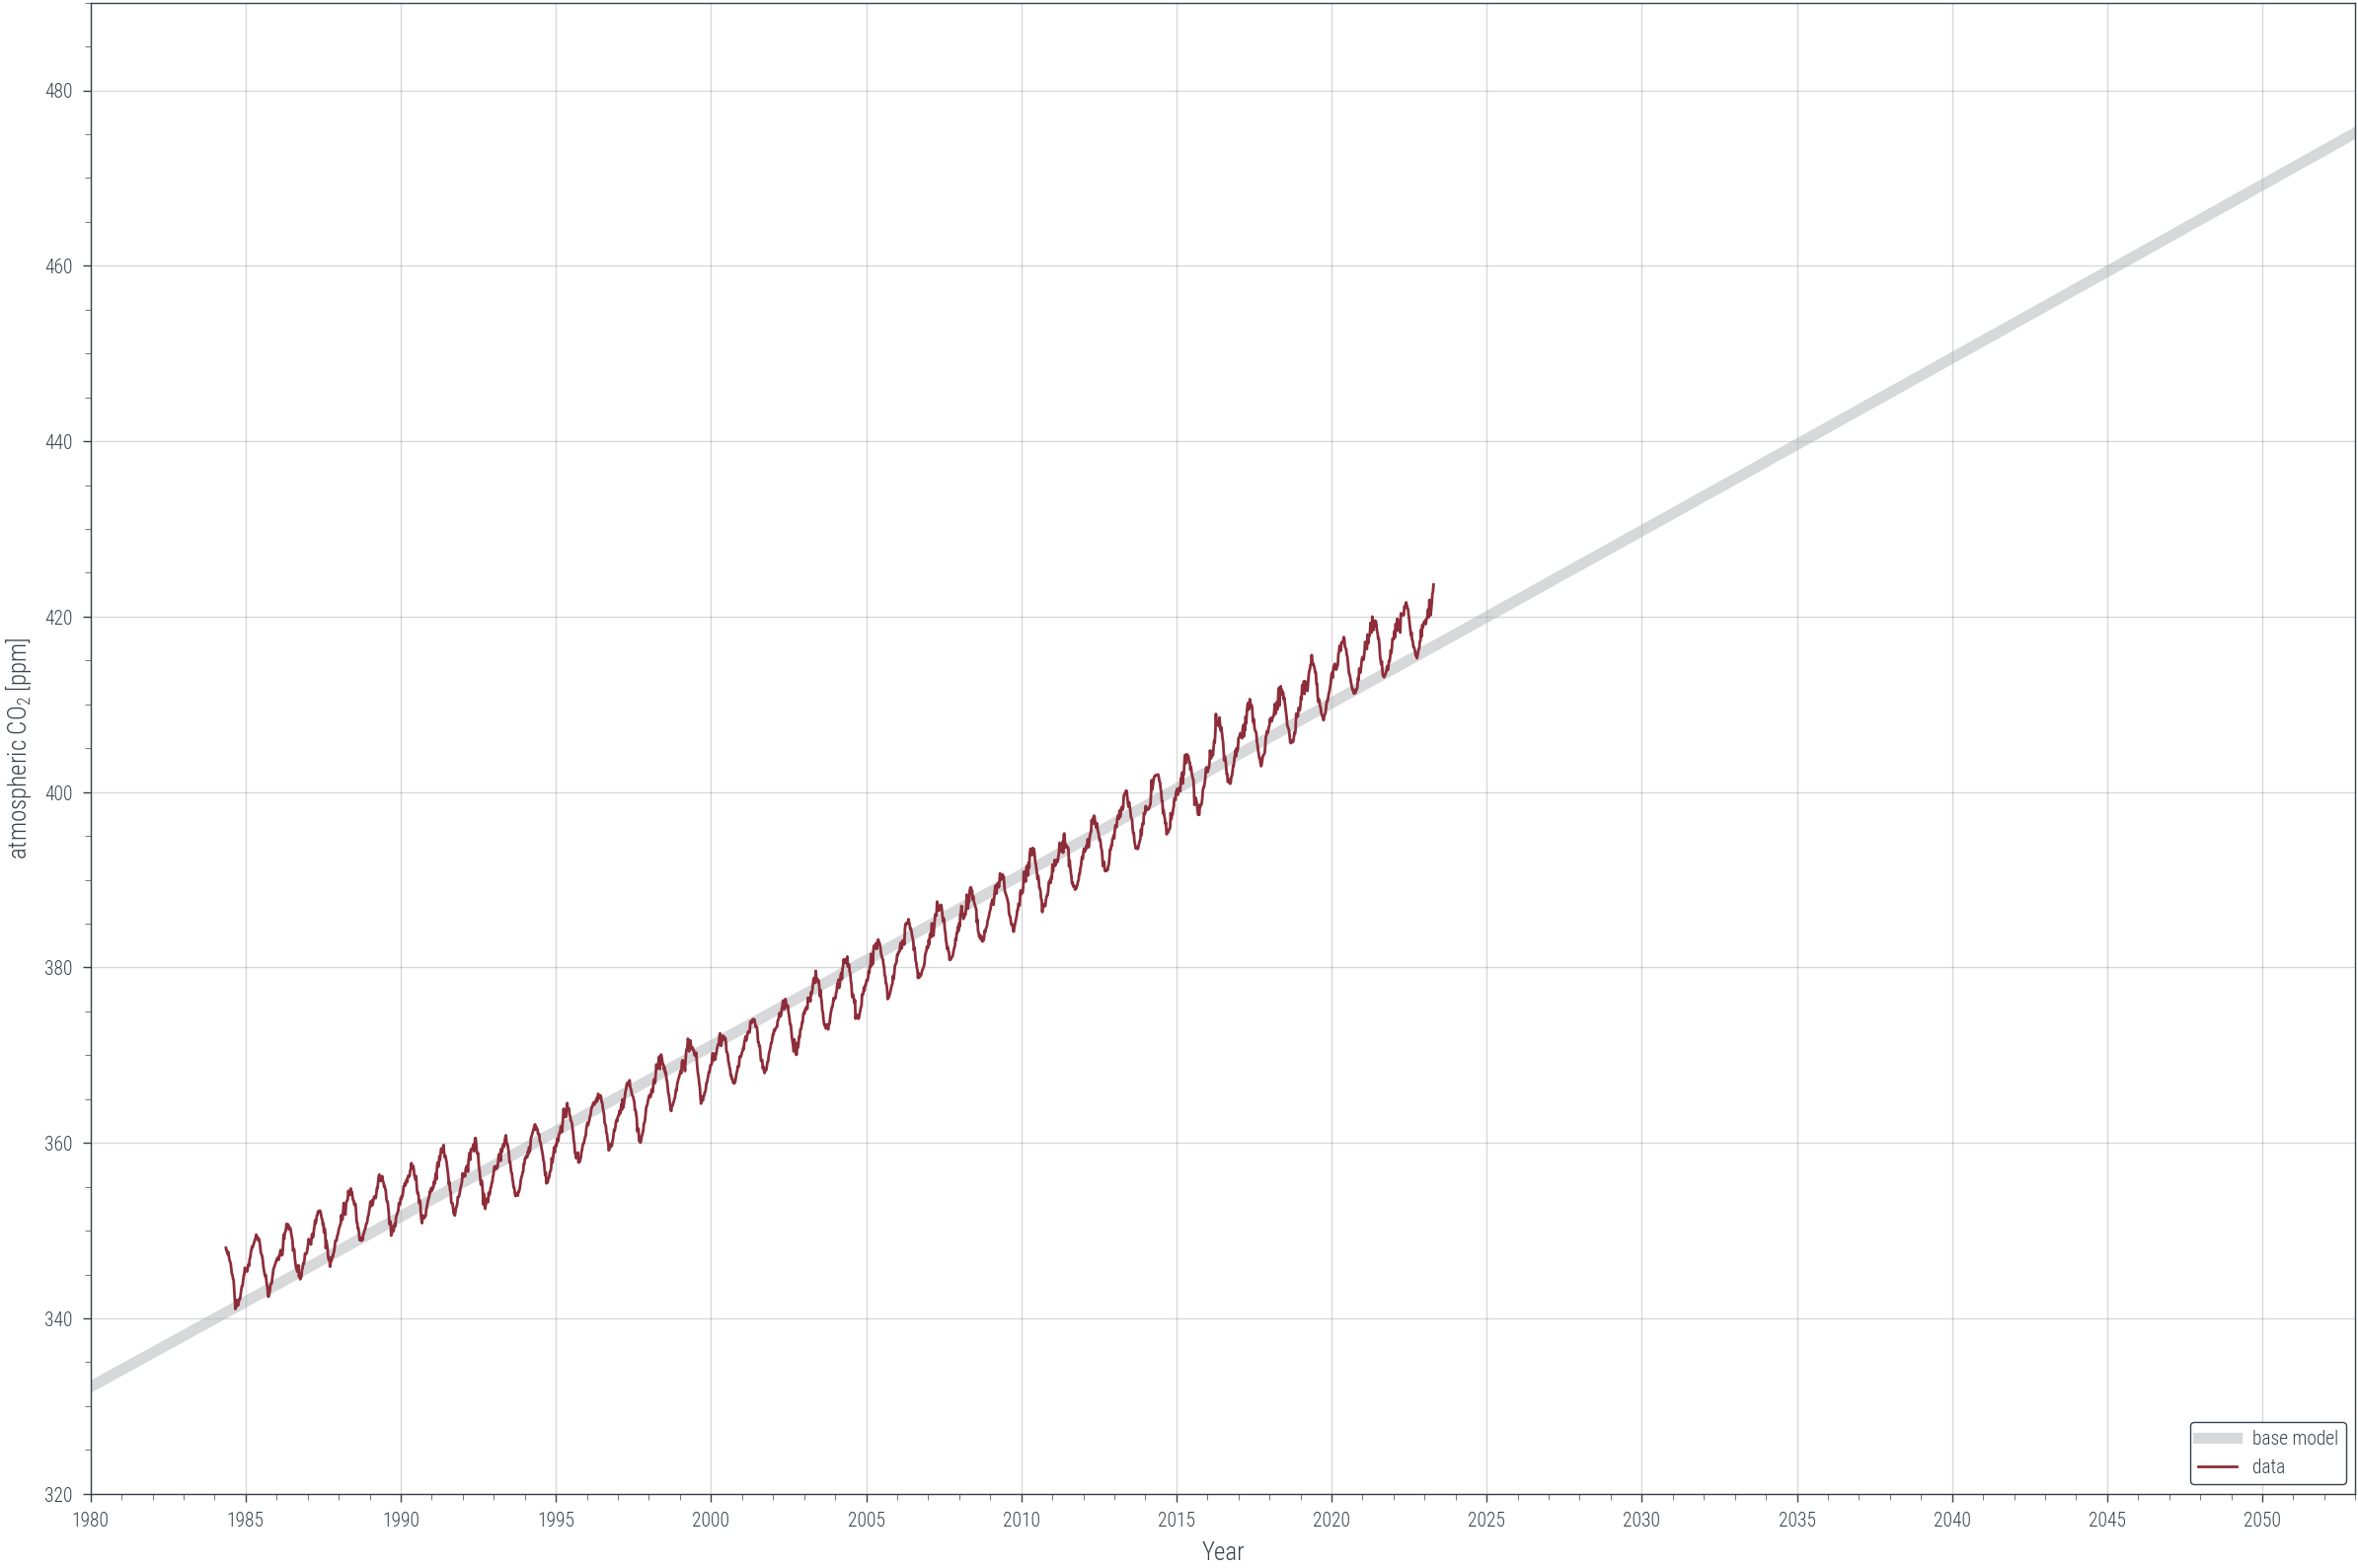

In [15]:
# Fit a polynomial of degree 2 to the X data.
phi = jnp.stack([jnp.ones(len(X)), jnp.asarray(X), jnp.asarray(X) ** 2])
w = jnp.linalg.solve((phi @ phi.T), phi @ Y)
Ypred_LinReg = w[0] + w[1] * X + w[2] * X ** 2

# Compute the RMSE.
print(f"simple polynomial of degree 2 regression has train RMSE {loss(Ypred_LinReg):0.2f}")

# Plot the data and the polynomial.
fig, ax = plt.subplots()
# Change figure size
fig.set_size_inches(12, 8)
x = jnp.linspace(1980, 2053, 200)
ax.plot(x, w[0] + w[1] * x + w[2] * x ** 2, color=rgb.tue_gray,
        lw=4, alpha=0.5, label="base model")
ax.plot(X, Y, label="data")

ax.set_xlabel("Year")
ax.set_ylabel("atmospheric CO$_2$ [ppm]")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_xlim([1980, 2053])
ax.set_ylim([320, 490])
ax.grid(which="major", axis="both")
ax.legend(loc="lower right", framealpha=1, facecolor="w");

Here nonlinearity is small but present since the training RMSE (3.06) is smaller than that of linear regression (3.09)  

#### Fit a Multi Layer Perceptron  

In [ ]:
# Fit a multilayer perceptron to the X data using PyTorch.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import numpy as np
from IPython.display import clear_output
%matplotlib inline

def visualize(net, X, Y): # PHI_tensor, Y_tensor
    clear_output(wait=True)
    # Plot on the test data
    fig, ax = plt.subplots()
    # Change figure size
    fig.set_size_inches(12, 8)
    x = np.linspace(1980, 2053, 200)
    x_tensor = torch.tensor(x, dtype=torch.float).reshape(-1, 1)
    #phi_tensor = torch.stack([torch.ones(len(x)), x_tensor.squeeze()], dim=1)
    y = net(x_tensor).detach().squeeze().numpy()
    ax.plot(x, y, color=rgb.tue_gray,
            lw=4, alpha=0.5, label="base model")
    ax.plot(X, Y, label="data")

    ax.set_xlabel("Year")
    ax.set_ylabel("atmospheric CO$_2$ [ppm]")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax.set_xlim([1980, 2053])
    ax.set_ylim([320, 490])
    ax.grid(which="major", axis="both")
    ax.legend(loc="lower right", framealpha=1, facecolor="w")

    plt.show();


# Define the model.
class SimpleMLP(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, output_size=1):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, dtype=torch.float, bias=True)
        #self.fc2 = nn.Linear(hidden_size, hidden_size, dtype=torch.float, bias=True)
        self.fc3 = nn.Linear(hidden_size, output_size, dtype=torch.float, bias=True)

        #self.fc1.weight.data = torch.tensor(np.random.randn(hidden_size, input_size), dtype=torch.float)
        #self.fc2.weight.data = torch.tensor(np.random.randn(hidden_size, hidden_size), dtype=torch.float)
        #self.fc3.weight.data = torch.tensor(np.random.randn(output_size, hidden_size), dtype=torch.float)

        

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x)) 
        #x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

def mse_loss(Y, Yhat):
    if Y.ndim == 2:
        Y_1 = Y.squeeze(1)
    else:
        Y_1 = Y
    if Yhat.ndim == 2:
        Yhat_1 = Yhat.squeeze(1)
    else:
        Yhat_1 = Yhat
    return (((Y_1 - Yhat_1) ** 2).mean())**0.5

net = SimpleMLP(hidden_size=1, input_size=1)

# Define the optimizer.
optimizer = optim.Adam(net.parameters(), lr=1)
scheduler = ExponentialLR(optimizer, gamma=0.99)

criterion = nn.MSELoss()

# Convert the data to tensors.
X_tensor = torch.tensor(X.values, dtype=torch.float).reshape(1,-1)
#PHI_tensor = torch.stack([torch.ones(len(X)), X_tensor], dim=1)
Y_tensor= torch.tensor(Y.values, dtype=torch.float).reshape(1, -1)

# Train the model.


for epoch in range(500):
    optimizer.zero_grad()
    output = net(X_tensor)
    loss_optim = mse_loss(Y_tensor, output)
    print(f"Epoch {epoch} has loss {loss_optim.item():0.2f}")
    loss_optim.backward()
    optimizer.step()
    if epoch % 5 == 0:
        visualize(net, X, Y)
    if epoch % 50 == 0:
        scheduler.step()

# Compute the RMSE.
Ypred = net(X_tensor).detach().squeeze().numpy()

print(f"simple MLP has train RMS {mse_loss(Y_tensor, Ypred):0.2f}")

Cannot perform regression, the model is too complex for the given data. It's hard for the MLP weights to converge.

### How to submit your work:

Export your answer into a pdf (for example using jupyter's `Save and Export Notebook as` feature in the `File` menu). Make sure to include all outputs, in particular plots. Also include your answer to the theory question, either by adding it as LaTeX code directly in the notebook, or by adding it as an extra page (e.g. a scan) to the pdf. Submit the exercise on Ilias, in the associated folder. **Do not forget to add your name(s) and matricel number(s) above!)**